# 키워드 == 코드잇 (2017-2022)

In [3]:
import tweepy

# 트위터 API에 접근하기 위한 개인 키를 입력
consumer_key = "f5rVJHYk4ZKCKDiqdfHq7YU84"
consumer_secret = "eGYtlTB5BduWhEdQIG8qyzYhICLymfgm0pqoRUizJibXURfWMf"

access_token = "1560514368764547072-1UXDAXTGLgGxFGD7FOu1dslmWJVCUX"
access_token_secret = "iuqmwjumUjAubKaFi34zu3paodna4ZvJld0chCltZsjLz"


# OAuth 핸들러 생성 & 개인정보 인증 요청
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# 액세스 요청
auth.set_access_token(access_token, access_token_secret)

# api instace 생성
api = tweepy.API(auth)

In [7]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# 트윗을 긁어와서 넣어놓을 리스트 생성
tweets_list = []

# TwitterSearchSc,ㅡ .raper를 이용하여 해당 트윗을 긁어와서 리스트에 넣기 ('검색어 since:시작날짜 until:끝나는날짜)
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('코드잇 since:2017-01-01 until:2022-11-22').get_items()):
    if i>5000:
        break
    tweets_list.append([tweet.date, tweet.content, tweet.likeCount])
    
# 다 긁어왔다면 데이터 프레임으로 저장시키기
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Text', 'Like'])
tweets_df

,Datetime,Text,Like
0,2022-11-21 14:02:06+00:00,코드잇 결제갈김 친절해보여서 실제로 친절함,0
1,2022-11-21 03:02:32+00:00,코드잇말고 코딩강의사이트 유.. 머드라? 유미?,0
2,2022-11-19 17:54:30+00:00,@rkfhemd_oc_ 님 코드잇 끊으실거면 스터디같이하실래요,0
3,2022-11-18 13:55:48+00:00,코드잇 미쳤음? 강의 배속기능이 없네,0
4,2022-11-18 07:19:45+00:00,디스코드 : 잇_#7627\n마스토돈 : @itsrob@planet.moe,0
...,...,...,...
722,2017-02-02 14:34:51+00:00,@_kiyean 헉 저 닉네임에 배틀코드잇응게 친추주새오!!,0
723,2017-01-27 00:06:16+00:00,코드잇 https://t.co/O2Z1oJDkp2,0
724,2017-01-25 07:17:04+00:00,얘둘아 옵치하자\n\n프로필에 배틀코드잇음 친축ㄱ,0
725,2017-01-12 07:45:32+00:00,내일 가도 코드 잇을까,0


In [8]:
tweets_df.to_csv('codeit_2017_2022')

In [10]:
df = pd.read_csv('./codeit_2017_2022')
df.head()

,Unnamed: 0,Datetime,Text,Like
0,0,2022-11-21 14:02:06+00:00,코드잇 결제갈김 친절해보여서 실제로 친절함,0
1,1,2022-11-21 03:02:32+00:00,코드잇말고 코딩강의사이트 유.. 머드라? 유미?,0
2,2,2022-11-19 17:54:30+00:00,@rkfhemd_oc_ 님 코드잇 끊으실거면 스터디같이하실래요,0
3,3,2022-11-18 13:55:48+00:00,코드잇 미쳤음? 강의 배속기능이 없네,0
4,4,2022-11-18 07:19:45+00:00,디스코드 : 잇_#7627\n마스토돈 : @itsrob@planet.moe,0


## 워드클라우드 만들기

In [11]:
text_data = df.Text.values
text_data

array(['코드잇 결제갈김 친절해보여서 실제로 친절함', '코드잇말고 코딩강의사이트 유.. 머드라? 유미?',
       '@rkfhemd_oc_ 님 코드잇 끊으실거면 스터디같이하실래요', '코드잇 미쳤음? 강의 배속기능이 없네',
       '디스코드 : 잇_#7627\n마스토돈 : @itsrob@planet.moe',
       '마스토돈? 잇듬 -근데어케쓰는지모름\n인스타? 잇음 - 이하동문\n디스코드? 잇음\n이정도면 업는게업는데',
       '스플3 디스코드 잇나....',
       '인스타 말고는 디엠 주세여 디스코드!!!! 잇음\n인스타 pu1uvv 로즈셀털일상무료공개',
       '코드잇 광고 뜰때마다 생각나서 캡쳐해서 수정해봄 문제시 삭제 https://t.co/hEDeF4MMnd',
       '블러 라이브네이션도 뭔 코드잇나요???...', '@secretjxuju 나이거존나뜸진짜 코드잇 ㅡㅡ',
       '코드잇을 수강해볼까........', '@cu_aaa_ 넹. 초대코드잇나요?',
       '@Mydress366 와이거 칭긔 어케 하나요 코드잇나',
       '혹시 공부나 할일하는 디스코드 잇을까요..........?', '아 미친 프박 까먹엇다 연장코드 잇을까',
       '@O23_33 헐 마자 드레스 코드잇나요???', '@hamzu_ki 큐알코드잇을까요 젭알',
       '네컷 큐알코드 잇을까? 제발 고화질로 올려줘요',
       '나도 아직 kfc뉴비라서 잘 모르는데, 나한테 자꾸 이거않되요 저거안돼요 이거하나요 충전코드잇나요 이래서 미치겟듬 제발, 뉴비배척은 안 해줘서 고맙지만 고인물들이랑 같은 취급 당하는 기분임\n두려움',
       '아 마따 제 방송 디스코드 잇서여 들어올 사람~~~?',
       '@gim_jaeun 코드잇스시먄 흑빼고 고대로 그려드림ㅁ다',
       '@ruepouchet 추천인 코드 잇당 &gt;.&lt; BHXYN 요거래 .. 이거 일년에 최대

In [12]:
data = ' '.join(text_data)
data

'코드잇 결제갈김 친절해보여서 실제로 친절함 코드잇말고 코딩강의사이트 유.. 머드라? 유미? @rkfhemd_oc_ 님 코드잇 끊으실거면 스터디같이하실래요 코드잇 미쳤음? 강의 배속기능이 없네 디스코드 : 잇_#7627\n마스토돈 : @itsrob@planet.moe 마스토돈? 잇듬 -근데어케쓰는지모름\n인스타? 잇음 - 이하동문\n디스코드? 잇음\n이정도면 업는게업는데 스플3 디스코드 잇나.... 인스타 말고는 디엠 주세여 디스코드!!!! 잇음\n인스타 pu1uvv 로즈셀털일상무료공개 코드잇 광고 뜰때마다 생각나서 캡쳐해서 수정해봄 문제시 삭제 https://t.co/hEDeF4MMnd 블러 라이브네이션도 뭔 코드잇나요???... @secretjxuju 나이거존나뜸진짜 코드잇 ㅡㅡ 코드잇을 수강해볼까........ @cu_aaa_ 넹. 초대코드잇나요? @Mydress366 와이거 칭긔 어케 하나요 코드잇나 혹시 공부나 할일하는 디스코드 잇을까요..........? 아 미친 프박 까먹엇다 연장코드 잇을까 @O23_33 헐 마자 드레스 코드잇나요??? @hamzu_ki 큐알코드잇을까요 젭알 네컷 큐알코드 잇을까? 제발 고화질로 올려줘요 나도 아직 kfc뉴비라서 잘 모르는데, 나한테 자꾸 이거않되요 저거안돼요 이거하나요 충전코드잇나요 이래서 미치겟듬 제발, 뉴비배척은 안 해줘서 고맙지만 고인물들이랑 같은 취급 당하는 기분임\n두려움 아 마따 제 방송 디스코드 잇서여 들어올 사람~~~? @gim_jaeun 코드잇스시먄 흑빼고 고대로 그려드림ㅁ다 @ruepouchet 추천인 코드 잇당 &gt;.&lt; BHXYN 요거래 .. 이거 일년에 최대 오천만원인가까지 송금할 수 잇어서 내가 주변 독일 유학생들꺼도 다 대신 해줘 수수료 아끼라고 ㅋㅋㅋㅋ !! @linmsl04 나도 몰랏음 근데 엠비 못 살 것 같은디.. 우리 콘 때 드레스 코드 잇음 나 엠디 절대 못사 근데좀성적코드잇음(많늠) 더케이콘 가시는 분들 왠만하면 아옮하시길.. 전 아옮햇는데 모바일티켓에 직원 인증코드

In [13]:
import re

wf = re.sub('[^가-힣]',' ',data)
wf = re.sub('\s+',' ',wf)
wf

'코드잇 결제갈김 친절해보여서 실제로 친절함 코드잇말고 코딩강의사이트 유 머드라 유미 님 코드잇 끊으실거면 스터디같이하실래요 코드잇 미쳤음 강의 배속기능이 없네 디스코드 잇 마스토돈 마스토돈 잇듬 근데어케쓰는지모름 인스타 잇음 이하동문 디스코드 잇음 이정도면 업는게업는데 스플 디스코드 잇나 인스타 말고는 디엠 주세여 디스코드 잇음 인스타 로즈셀털일상무료공개 코드잇 광고 뜰때마다 생각나서 캡쳐해서 수정해봄 문제시 삭제 블러 라이브네이션도 뭔 코드잇나요 나이거존나뜸진짜 코드잇 코드잇을 수강해볼까 넹 초대코드잇나요 와이거 칭긔 어케 하나요 코드잇나 혹시 공부나 할일하는 디스코드 잇을까요 아 미친 프박 까먹엇다 연장코드 잇을까 헐 마자 드레스 코드잇나요 큐알코드잇을까요 젭알 네컷 큐알코드 잇을까 제발 고화질로 올려줘요 나도 아직 뉴비라서 잘 모르는데 나한테 자꾸 이거않되요 저거안돼요 이거하나요 충전코드잇나요 이래서 미치겟듬 제발 뉴비배척은 안 해줘서 고맙지만 고인물들이랑 같은 취급 당하는 기분임 두려움 아 마따 제 방송 디스코드 잇서여 들어올 사람 코드잇스시먄 흑빼고 고대로 그려드림 다 추천인 코드 잇당 요거래 이거 일년에 최대 오천만원인가까지 송금할 수 잇어서 내가 주변 독일 유학생들꺼도 다 대신 해줘 수수료 아끼라고 나도 몰랏음 근데 엠비 못 살 것 같은디 우리 콘 때 드레스 코드 잇음 나 엠디 절대 못사 근데좀성적코드잇음 많늠 더케이콘 가시는 분들 왠만하면 아옮하시길 전 아옮햇는데 모바일티켓에 직원 인증코드잇음 코드잇 게임 같고 넘무 재밌다 만드는 방법 코드잇 혹시 지나가는 단원분 아직 유효기간 안끝난 프박코드 잇나요 지금 어디왔는데 프린팅박스가 보입니다 급해요 뭐 없을까요 원하는코드 잇우면 말해죠 나두 돌아다니면서 보께 히히 파이썬 일단 책이 정말 많아서 큰 서점에서 파이썬 책 쫘라락 훑어보고 제일 만만하다 싶은 놈으로 구입해요 아님 인터넷 강의도 많으니까요 인프런이나 코드잇에서 배우는것도 추천합니다 사실 파이썬보다 더 만만한게 인데 이건 아마 웹디자인에서만 

In [19]:
#문자 형태 분석, tag:품시
from konlpy.tag import Okt

# Okt 함수를 이용해 형태소 분석
okt = Okt()
line =[]
line = okt.pos(wf)

noun_list =[]
# 명사 또는 형용사인 단어만 noun_list에 넣어주기
for word, tag in line:
    if(tag=='Noun') & (len(word)>1):
        noun_list.append(word)
# 명사 또는 형용사인 단어 및 2글자 이상인 단어 선택 시
# n_adj = [word for word, tag in line if tag in ['Noun','Adjective'] and len(word) > 1]

#제외할 단어 추가
stop_words = "아 코드잇 정말 분씩 하고 있어요 년 건 한 쿠키뉴스 뉴스 흑흑 헤헷 헤헥 코드 드레스코드 친구코드 디스코드 이벤트코드 큐알코드 중복코드"
stop_words = set(stop_words.split(' '))
        
noun_list = [word for word in noun_list if not word in stop_words]
print(noun_list)

JVMNotFoundException: No JVM shared library file (libjli.dylib) found. Try setting up the JAVA_HOME environment variable properly.

In [ ]:
from collections import Counter
one_word = []
for word, tag in line:
    if (tag == 'Noun') & (len(word)==1):
        one_word.append(word)
one_dict = dict(Counter(one_word).most_common())
keys = sorted(one_dict.items(), key=lambda x:x[1], reverse=True)
keys[:10]

In [29]:
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

rc('font',family='Malgun Gothic') #한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
count = Counter(noun_list)
data = dict(count.most_common())
series = pd.Series(data)
df = pd.DataFrame(series,columns=['cnt'])
df1 = df.sort_values(by='cnt',ascending=False)[:50]
df1.reset_index(inplace=True)
df1

,index,cnt
0,망막,195
1,고혈압,180
2,위험,162
3,병증,148
4,백내장,146
5,치료,141
6,고지혈증,131
7,위해,127
8,방법,126
9,유지,126


(-0.5, 799.5, 599.5, -0.5)

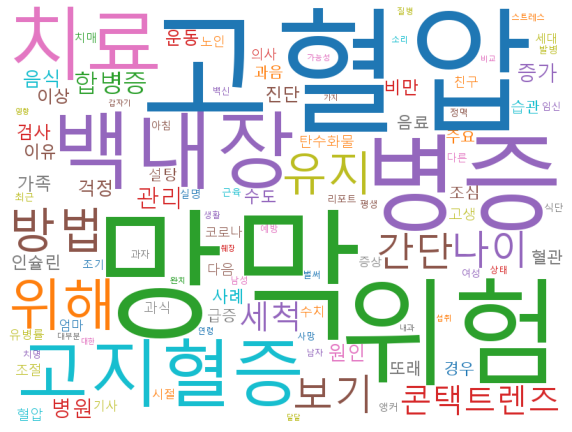

In [48]:
from wordcloud import WordCloud

plt.figure(figsize=(10,8))
wordcloud = WordCloud(font_path='../Visualization/dataset/malgun.ttf',background_color='white',
                     colormap='tab10', width=800, height=600, max_words=100, prefer_horizontal=1).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')